In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quran-clean-without-araab/Quran-clean-without-aarab.csv


In [64]:
quran=pd.read_csv('../input/quran-clean-without-araab/Quran-clean-without-aarab.csv')

In [65]:
quran

,Unnamed: 0,SurahNum,AyahNum,Ayah
0,0,1,1,بسم الله الرحمن الرحيم
1,1,1,2,الحمد لله رب العالمين
2,2,1,3,الرحمن الرحيم
3,3,1,4,مالك يوم الدين
4,4,1,5,إياك نعبد وإياك نستعين
...,...,...,...,...
6231,6231,114,2,ملك الناس
6232,6232,114,3,إله الناس
6233,6233,114,4,من شر الوسواس الخناس
6234,6234,114,5,الذي يوسوس في صدور الناس


In [66]:
quran.info()
quran.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6236 non-null   int64 
 1   SurahNum    6236 non-null   int64 
 2   AyahNum     6236 non-null   int64 
 3   Ayah        6236 non-null   object
dtypes: int64(3), object(1)
memory usage: 195.0+ KB


,Unnamed: 0,SurahNum,AyahNum
count,6236.000000,6236.000000,6236.000000
mean,3117.500000,33.519724,53.506575
std,1800.322471,26.461261,50.463924
min,0.000000,1.000000,1.000000
25%,1558.750000,11.000000,16.000000
50%,3117.500000,26.000000,38.000000
75%,4676.250000,51.000000,75.000000
max,6235.000000,114.000000,286.000000


In [67]:
quran=quran.drop('Unnamed: 0',axis=1)
quran

,SurahNum,AyahNum,Ayah
0,1,1,بسم الله الرحمن الرحيم
1,1,2,الحمد لله رب العالمين
2,1,3,الرحمن الرحيم
3,1,4,مالك يوم الدين
4,1,5,إياك نعبد وإياك نستعين
...,...,...,...
6231,114,2,ملك الناس
6232,114,3,إله الناس
6233,114,4,من شر الوسواس الخناس
6234,114,5,الذي يوسوس في صدور الناس


In [68]:
quran.head()

,SurahNum,AyahNum,Ayah
0,1,1,بسم الله الرحمن الرحيم
1,1,2,الحمد لله رب العالمين
2,1,3,الرحمن الرحيم
3,1,4,مالك يوم الدين
4,1,5,إياك نعبد وإياك نستعين


In [69]:
df3 = quran.groupby('SurahNum')['AyahNum'].agg('count')
df3

SurahNum
1        7
2      286
3      200
4      176
5      120
      ... 
110      3
111      5
112      4
113      5
114      6
Name: AyahNum, Length: 114, dtype: int64

In [70]:
a = np.arange(115)
surahs = np.delete(a, 0)
surahs

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114])

In [71]:
ayats_in_surahs = df3.array


Text(0.5, 1.0, 'No. of Ayats in each Surah')

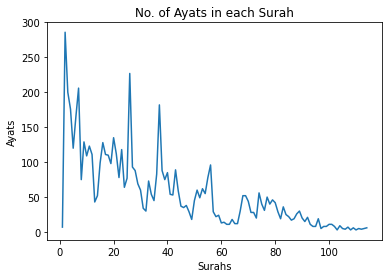

In [72]:
plt.plot(surahs, ayats_in_surahs)
plt.xlabel('Surahs')
plt.ylabel('Ayats') 
plt.title('No. of Ayats in each Surah')

Text(0.5, 1.0, 'No. of Ayats in each Surah')

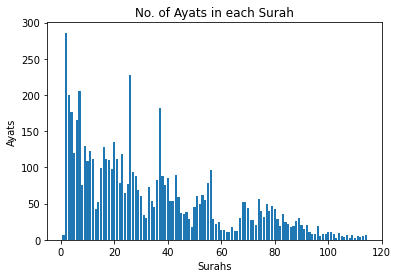

In [73]:
plt.bar(surahs, ayats_in_surahs)
plt.xlabel('Surahs')
plt.ylabel('Ayats') 
plt.title('No. of Ayats in each Surah')

In [74]:
#Splitting Ayahs word by word¶
def words_splitter(x):
  token = x.split(' ')[0]
  word.append(token)
  return word

In [75]:
quran.iloc[0]['Ayah'].split(' ')[0]

'بسم'

In [76]:
quran.tail(3)

,SurahNum,AyahNum,Ayah
6233,114,4,من شر الوسواس الخناس
6234,114,5,الذي يوسوس في صدور الناس
6235,114,6,من الجنة والناس


In [77]:
words = []
for i in range(6236):
    word = quran.iloc[i]['Ayah'].split(' ')
    for j in range(len(word)):
        words.append(word[j])

In [78]:
#All words

#words

In [79]:
#Total No. of words in Quran

len(words)

78245

In [80]:
df_words = pd.DataFrame(words)
df_words.tail(3)

,0
78242,من
78243,الجنة
78244,والناس


In [81]:
df_words1 = df_words[0].str.strip()
df_words1 = pd.DataFrame(df_words1)

In [82]:
#Grouped all words by it count


df_words2 = pd.DataFrame(df_words1.groupby(0)[0].agg('count').sort_values(axis = 0, ascending=False))
df_words2['words'] = df_words2.index
df_words2 = df_words2.rename(columns={0: 'word_counts'})
indexx = np.arange(len(df_words2))
df_words2.set_index(indexx, inplace= True)
df_words2

,word_counts,words
0,2763,من
1,2265,الله
2,1185,في
3,1010,ما
4,966,إن
...,...,...
14865,1,طرف
14866,1,طرفا
14867,1,طرفك
14868,1,طرفهم


 من الله
 

<BarContainer object of 100 artists>

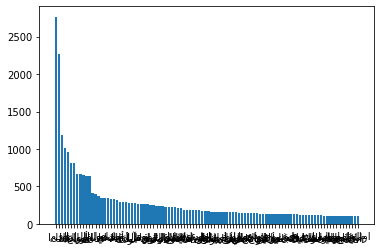

In [83]:
plt.bar(df_words2['words'][:100], df_words2['word_counts'][:100])

Text(0.5, 1.0, 'No. of Times each word was repeated')

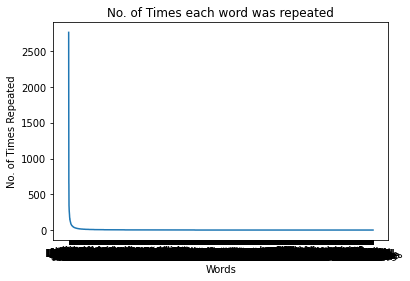

In [84]:
plt.plot(df_words2['words'], df_words2['word_counts'])
plt.xlabel('Words')
plt.ylabel('No. of Times Repeated') 
plt.title('No. of Times each word was repeated')

In [85]:
#Made a function which tells how much Quran can be learnt by learning how many words
def words_percentage(x):
    percentage = df_words2['word_counts'][:x].sum() * 100 /df_words2['word_counts'].sum()
    print('Total No. of words in Quran = 78245')
    print(f"Total No. of words in Quran learnt = {df_words2['word_counts'][:x].sum()}, if {x} unique words learned")
    print('Total No. of unique words in Quran = 14870')
    print(f'Total No. of unqiue words selected = {x}')
    print(f'Percentage Quran learnt using {x} words = {percentage} %')
    print(f"Percentage of those words '{x}' from total words '14870' = {x*100/14870} %")

In [86]:
#80% of the Quran can be learnt from 20% words

words_percentage(3045)

Total No. of words in Quran = 78245
Total No. of words in Quran learnt = 62596, if 3045 unique words learned
Total No. of unique words in Quran = 14870
Total No. of unqiue words selected = 3045
Percentage Quran learnt using 3045 words = 80.0 %
Percentage of those words '3045' from total words '14870' = 20.477471418964356 %
